# Model Dynamics

In [7]:
%time

import csv
import pickle
import numpy as np
import random as rnd
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib as mpl
import pylab as plt
import os

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

# os.chdir('<Directory>')

%matplotlib inline


### Fixed Model Parameters ###

D = 2*365              
t_steps = 10**4        
inc_pd = 5.5             
dt = round(t_steps/D)           
t = np.linspace(0, D, t_steps)  

nu = 0.03053968253968254  
mu = 1/(80.3 * 365)       
muI = mu + 0.038/(3.5*7) 
k = 0.6486486486486486    
p = 0.956                 


### Initial Condition ###

X0 = [57.05 * 10**6, 5*13.3, 13.3, 13.3, 0, 0.01]


def dXdt(X, t, bA, bI, bW, sA, sI, epsilon):
    
    S = X[0]
    E = X[1]
    A = X[2]
    I = X[3]
    R = X[4]
    W = X[5]

    N = S + E + A + I + R
    L = (bA * A + bI * I)/N + bW * W
    
    omega = 1/(inc_pd - epsilon)
    
    dSdt = mu * (N - S) - L * S
    dEdt = L * S - (1/epsilon + mu) * E
    dAdt = (1/epsilon) * E - (omega + mu) * A
    dIdt = (1 - p) * omega * A - (nu + muI) * I
    dRdt = p * omega * A + nu * I - mu * R
    dWdt = (sA * A + sI * I) * (1 - W)/N - k * W

    return np.array([dSdt, dEdt, dAdt, dIdt, dRdt, dWdt])



Wall time: 0 ns


Wall time: 0 ns


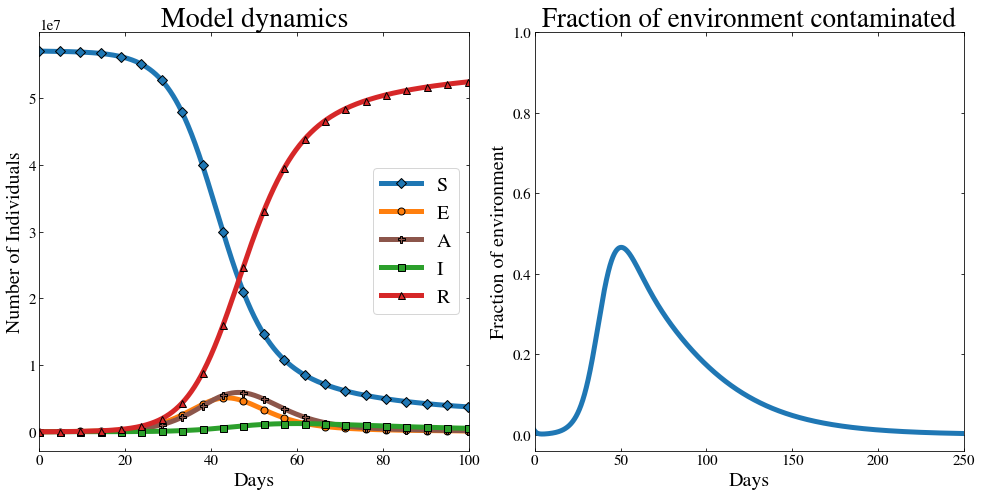

In [3]:
%time


# """ Nominal """
bA = 0.5497938413115383
bI = 0.4909463148261044
bW = 0.031100446700197397
sA = 3.403914785083266 
sI = 13.492166134223032 
epsilon = 2.478385725999245 
omega = 0.33094892640811974 
mu = 3.411863047817261*10**(-5) 
muI = 0.0015851390386414379
nu = 0.03053968253968254 
k = 0.6486486486486486 
p = 0.956 
inc_pd = 5.5 


t = np.linspace(0, D, t_steps) 
Y = odeint(dXdt, y0=X0, t=t, args=(bA, bI, bW, sA, sI, epsilon))

S = Y[:, 0]
E = Y[:, 1]
A = Y[:, 2]
I = Y[:, 3]
R = Y[:, 4]
W = Y[:, 5]


xlim = 100

fig, ax = plt.subplots(1, 2, figsize = [14, 7])

plt.subplots_adjust(hspace = 0.9)

ax[0].plot(t, S, label = 'S', linewidth = 5, c = 'C0', marker="D", ms=7, markevery = 65, mec = 'k',mfc = 'C0')
ax[0].plot(t, E, label = 'E', linewidth = 5, c = 'C1', marker="o", ms=7, markevery = 65, mec = 'k',mfc = 'C1')
ax[0].plot(t, A, label = 'A', linewidth = 5, c = 'C5', marker="P", ms=7, markevery = 65, mec = 'k',mfc = 'C5')
ax[0].plot(t, I, label = 'I', linewidth = 5, c = 'C2', marker="s", ms=7, markevery = 65, mec = 'k',mfc = 'C2')
ax[0].plot(t, R, label = 'R', linewidth = 5, c = 'C3', marker="^", ms=7, markevery = 65, mec = 'k',mfc = 'C3')
#ax[0].plot(t, S + E + A + I + R, label = 'total', linewidth = 5, c = 'C4')
ax[1].plot(t, W, linewidth = 5)

ax[0].legend(fontsize = 20)
ax[0].set_title('Model dynamics', fontsize = 28)
ax[0].set_xlim(0, xlim)
ax[0].set_ylabel('Number of Individuals', fontsize = 20)
ax[0].set_xlabel('Days', fontsize = 20)
ax[0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 1))
ax[1].set_xlabel('Days', fontsize = 20)
ax[1].set_ylabel('Fraction of environment', fontsize = 20)
ax[1].set_xlim(0, 250)
ax[1].set_ylim(-0.04, 1)
ax[1].set_title('Fraction of environment contaminated', fontsize = 27)

for i in range(2):
    ax[i].yaxis.get_offset_text().set_fontsize(15)
    ax[i].tick_params(axis = 'both', direction = 'in', top = True, right = True, labelsize = 15)

plt.tight_layout()
fig.savefig('C:/Users/user/Desktop/SEAIR Nom.jpg', dpi=300, bbox_inches = "tight") 



Wall time: 0 ns


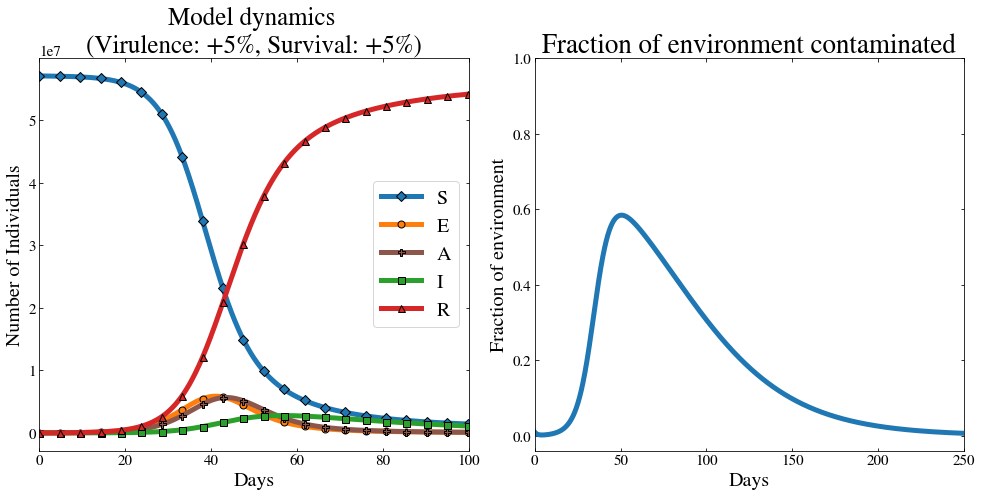

In [4]:
%time


""" Vir + 5% and Sus + 5% """

adjustment = 0.05

bA = 0.5497938413115383 + (0.5497938413115383 * adjustment)
bI = 0.4909463148261044 + (0.4909463148261044 * adjustment)
bW = 0.031100446700197397 + (0.031100446700197397 * adjustment)
sA = 3.403914785083266 + (3.403914785083266 * adjustment)
sI = 13.492166134223032 + (13.492166134223032 * adjustment)
epsilon = 2.478385725999245 + (2.478385725999245 * adjustment)
omega = 0.33094892640811974 + (0.33094892640811974 * adjustment)
mu = 3.411863047817261*10**(-5) + (3.411863047817261*10**(-5) * adjustment)
muI = 0.0015851390386414379 + (0.0015851390386414379 * adjustment)
nu = 0.03053968253968254 - (0.03053968253968254 * adjustment)
k = 0.6486486486486486 - (0.6486486486486486 * adjustment)
p = 0.956 - (0.956 * adjustment)
inc_pd = 5.5 - (5.5 * adjustment)

t = np.linspace(0, D, t_steps) 
Y = odeint(dXdt, y0=X0, t=t, args=(bA, bI, bW, sA, sI, epsilon))

S = Y[:, 0]
E = Y[:, 1]
A = Y[:, 2]
I = Y[:, 3]
R = Y[:, 4]
W = Y[:, 5]


""" plotting the SEAIR-W model """

xlim = 100

fig, ax = plt.subplots(1, 2, figsize = [14, 7])

plt.subplots_adjust(hspace = 0.9)

ax[0].plot(t, S, label = 'S', linewidth = 5, c = 'C0', marker="D", ms=7, markevery = 65, mec = 'k',mfc = 'C0')
ax[0].plot(t, E, label = 'E', linewidth = 5, c = 'C1', marker="o", ms=7, markevery = 65, mec = 'k',mfc = 'C1')
ax[0].plot(t, A, label = 'A', linewidth = 5, c = 'C5', marker="P", ms=7, markevery = 65, mec = 'k',mfc = 'C5')
ax[0].plot(t, I, label = 'I', linewidth = 5, c = 'C2', marker="s", ms=7, markevery = 65, mec = 'k',mfc = 'C2')
ax[0].plot(t, R, label = 'R', linewidth = 5, c = 'C3', marker="^", ms=7, markevery = 65, mec = 'k',mfc = 'C3')
ax[1].plot(t, W, linewidth = 5)

ax[0].legend(fontsize = 20)
ax[0].set_title('Model dynamics \n(Virulence: +5%, Survival: +5%)', fontsize = 25)
ax[0].set_xlim(0, xlim)
ax[0].set_ylabel('Number of Individuals', fontsize = 20)
ax[0].set_xlabel('Days', fontsize = 20)
ax[0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 1))
ax[1].set_xlabel('Days', fontsize = 20)
ax[1].set_ylabel('Fraction of environment', fontsize = 20)
ax[1].set_xlim(0, 250)
ax[1].set_ylim(-0.04, 1)
ax[1].set_title('Fraction of environment contaminated', fontsize = 27)

for i in range(2):
    ax[i].yaxis.get_offset_text().set_fontsize(15)
    ax[i].tick_params(axis = 'both', direction = 'in', top = True, right = True, labelsize = 15)

plt.tight_layout()
fig.savefig('C:/Users/user/Desktop/SEAIR ++.jpg', dpi=300, bbox_inches = "tight") 



Wall time: 0 ns


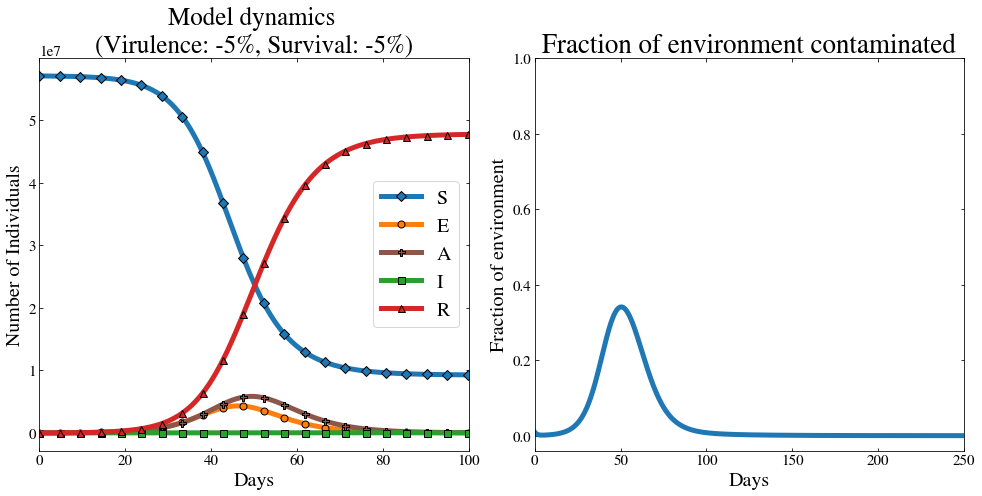

In [6]:
%time

""" Vir -5% and Sus -5% """

adjustment = 0.05

bA = 0.5497938413115383 - (0.5497938413115383 * adjustment)
bI = 0.4909463148261044 - (0.4909463148261044 * adjustment)
bW = 0.031100446700197397 - (0.031100446700197397 * adjustment)
sA = 3.403914785083266 - (3.403914785083266 * adjustment)
sI = 13.492166134223032 - (13.492166134223032 * adjustment)
epsilon = 2.478385725999245 - (2.478385725999245 * adjustment)
omega = 0.33094892640811974 - (0.33094892640811974 * adjustment)
mu = 3.411863047817261*10**(-5) - (3.411863047817261*10**(-5) * adjustment)
muI = 0.0015851390386414379 - (0.0015851390386414379 * adjustment)
nu = 0.03053968253968254 + (0.03053968253968254 * adjustment)
k = 0.6486486486486486 + (0.6486486486486486 * adjustment)
p = 0.956 + (0.956 * adjustment)
inc_pd = 5.5 + (5.5 * adjustment)


t = np.linspace(0, D, t_steps) 
Y = odeint(dXdt, y0=X0, t=t, args=(bA, bI, bW, sA, sI, epsilon))

S = Y[:, 0]
E = Y[:, 1]
A = Y[:, 2]
I = Y[:, 3]
R = Y[:, 4]
W = Y[:, 5]


xlim = 100

fig, ax = plt.subplots(1, 2, figsize = [14, 7])

plt.subplots_adjust(hspace = 0.9)

ax[0].plot(t, S, label = 'S', linewidth = 5, c = 'C0', marker="D", ms=7, markevery = 65, mec = 'k',mfc = 'C0')
ax[0].plot(t, E, label = 'E', linewidth = 5, c = 'C1', marker="o", ms=7, markevery = 65, mec = 'k',mfc = 'C1')
ax[0].plot(t, A, label = 'A', linewidth = 5, c = 'C5', marker="P", ms=7, markevery = 65, mec = 'k',mfc = 'C5')
ax[0].plot(t, I, label = 'I', linewidth = 5, c = 'C2', marker="s", ms=7, markevery = 65, mec = 'k',mfc = 'C2')
ax[0].plot(t, R, label = 'R', linewidth = 5, c = 'C3', marker="^", ms=7, markevery = 65, mec = 'k',mfc = 'C3')
ax[1].plot(t, W, linewidth = 5)

ax[0].legend(fontsize = 20)
ax[0].set_title('Model dynamics \n(Virulence: -5%, Survival: -5%)', fontsize = 25)
ax[0].set_xlim(0, xlim)
ax[0].set_ylabel('Number of Individuals', fontsize = 20)
ax[0].set_xlabel('Days', fontsize = 20)
ax[0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 1))
ax[1].set_xlabel('Days', fontsize = 20)
ax[1].set_ylabel('Fraction of environment', fontsize = 20)
ax[1].set_xlim(0, 250)
ax[1].set_ylim(-0.04, 1)
ax[1].set_title('Fraction of environment contaminated', fontsize = 27)

for i in range(2):
    ax[i].yaxis.get_offset_text().set_fontsize(15)
    ax[i].tick_params(axis = 'both', direction = 'in', top = True, right = True, labelsize = 15)

plt.tight_layout()
fig.savefig('C:/Users/user/Desktop/SEAIR --.jpg', dpi=300, bbox_inches = "tight") 



Wall time: 0 ns


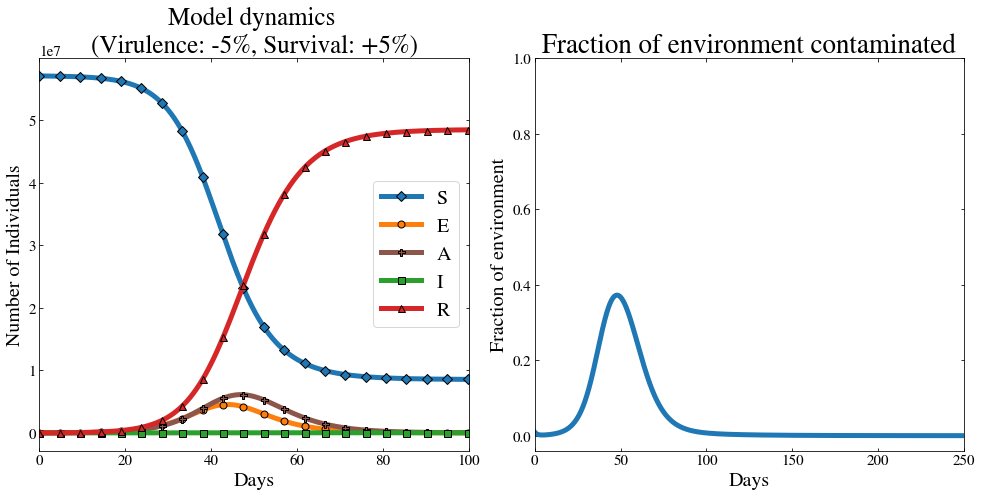

In [7]:
%time

""" Vir -5% and Sus +5% """

adjustment = 0.05

bA = 0.5497938413115383 - (0.5497938413115383 * adjustment)
bI = 0.4909463148261044 - (0.4909463148261044 * adjustment)
bW = 0.031100446700197397 + (0.031100446700197397 * adjustment)
sA = 3.403914785083266 - (3.403914785083266 * adjustment)
sI = 13.492166134223032 - (13.492166134223032 * adjustment)
epsilon = 2.478385725999245 - (2.478385725999245 * adjustment)
omega = 0.33094892640811974 - (0.33094892640811974 * adjustment)
mu = 3.411863047817261*10**(-5) - (3.411863047817261*10**(-5) * adjustment)
muI = 0.0015851390386414379 - (0.0015851390386414379 * 0.05)
nu = 0.03053968253968254 + (0.03053968253968254 * adjustment)
k = 0.6486486486486486 - (0.6486486486486486 * adjustment)
p = 0.956 + (0.956 * adjustment)
inc_pd = 5.5 + (5.5 * adjustment)


t = np.linspace(0, D, t_steps) 
Y = odeint(dXdt, y0=X0, t=t, args=(bA, bI, bW, sA, sI, epsilon))

S = Y[:, 0]
E = Y[:, 1]
A = Y[:, 2]
I = Y[:, 3]
R = Y[:, 4]
W = Y[:, 5]

""" plotting the SEAIR-W model """

xlim = 100

fig, ax = plt.subplots(1, 2, figsize = [14, 7])

plt.subplots_adjust(hspace = 0.9)

ax[0].plot(t, S, label = 'S', linewidth = 5, c = 'C0', marker="D", ms=7, markevery = 65, mec = 'k',mfc = 'C0')
ax[0].plot(t, E, label = 'E', linewidth = 5, c = 'C1', marker="o", ms=7, markevery = 65, mec = 'k',mfc = 'C1')
ax[0].plot(t, A, label = 'A', linewidth = 5, c = 'C5', marker="P", ms=7, markevery = 65, mec = 'k',mfc = 'C5')
ax[0].plot(t, I, label = 'I', linewidth = 5, c = 'C2', marker="s", ms=7, markevery = 65, mec = 'k',mfc = 'C2')
ax[0].plot(t, R, label = 'R', linewidth = 5, c = 'C3', marker="^", ms=7, markevery = 65, mec = 'k',mfc = 'C3')
ax[1].plot(t, W, linewidth = 5)

ax[0].legend(fontsize = 20)
ax[0].set_title('Model dynamics \n(Virulence: -5%, Survival: +5%)', fontsize = 25)
ax[0].set_xlim(0, xlim)
ax[0].set_ylabel('Number of Individuals', fontsize = 20)
ax[0].set_xlabel('Days', fontsize = 20)
ax[0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 1))
ax[1].set_xlabel('Days', fontsize = 20)
ax[1].set_ylabel('Fraction of environment', fontsize = 20)
ax[1].set_xlim(0, 250)
ax[1].set_ylim(-0.04, 1)
ax[1].set_title('Fraction of environment contaminated', fontsize = 27)

for i in range(2):
    ax[i].yaxis.get_offset_text().set_fontsize(15)
    ax[i].tick_params(axis = 'both', direction = 'in', top = True, right = True, labelsize = 15)

plt.tight_layout()
fig.savefig('C:/Users/user/Desktop/SEAIR -+.jpg', dpi=300, bbox_inches = "tight") 



Wall time: 0 ns


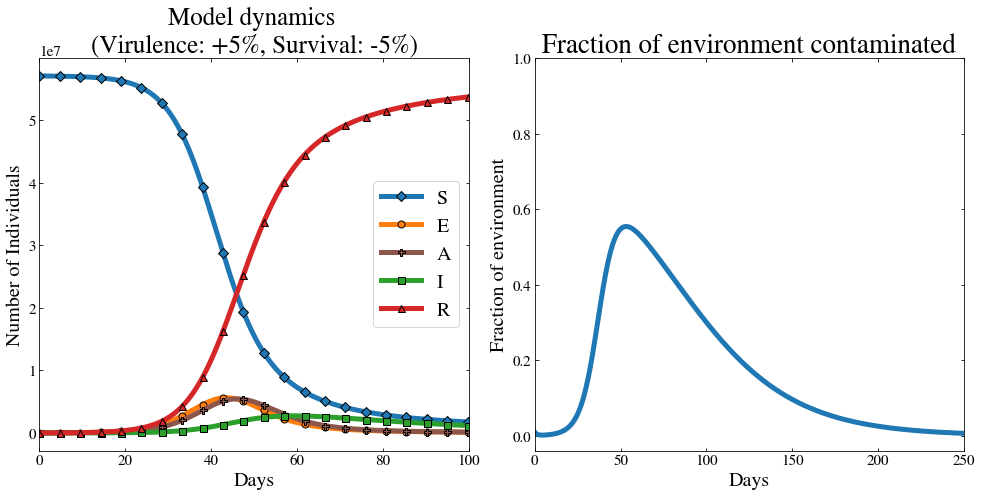

In [8]:
%time

""" Vir +5% and Sus -5% """

adjustment = 0.05

bA = 0.5497938413115383 + (0.5497938413115383 * adjustment)
bI = 0.4909463148261044 + (0.4909463148261044 * adjustment)
bW = 0.031100446700197397 - (0.031100446700197397 * adjustment)
sA = 3.403914785083266 + (3.403914785083266 * adjustment)
sI = 13.492166134223032 + (13.492166134223032 * adjustment)
epsilon = 2.478385725999245 + (2.478385725999245 * adjustment)
omega = 0.33094892640811974 + (0.33094892640811974 * adjustment)
mu = 3.411863047817261*10**(-5) + (3.411863047817261*10**(-5) * adjustment)
muI = 0.0015851390386414379 + (0.0015851390386414379 * adjustment)
nu = 0.03053968253968254 - (0.03053968253968254 * adjustment)
k = 0.6486486486486486 + (0.6486486486486486 * adjustment)
p = 0.956 - (0.956 * adjustment)
inc_pd = 5.5 - (5.5 * adjustment)


t = np.linspace(0, D, t_steps) 
Y = odeint(dXdt, y0=X0, t=t, args=(bA, bI, bW, sA, sI, epsilon))

S = Y[:, 0]
E = Y[:, 1]
A = Y[:, 2]
I = Y[:, 3]
R = Y[:, 4]
W = Y[:, 5]


xlim = 100

fig, ax = plt.subplots(1, 2, figsize = [14, 7])

plt.subplots_adjust(hspace = 0.9)

ax[0].plot(t, S, label = 'S', linewidth = 5, c = 'C0', marker="D", ms=7, markevery = 65, mec = 'k',mfc = 'C0')
ax[0].plot(t, E, label = 'E', linewidth = 5, c = 'C1', marker="o", ms=7, markevery = 65, mec = 'k',mfc = 'C1')
ax[0].plot(t, A, label = 'A', linewidth = 5, c = 'C5', marker="P", ms=7, markevery = 65, mec = 'k',mfc = 'C5')
ax[0].plot(t, I, label = 'I', linewidth = 5, c = 'C2', marker="s", ms=7, markevery = 65, mec = 'k',mfc = 'C2')
ax[0].plot(t, R, label = 'R', linewidth = 5, c = 'C3', marker="^", ms=7, markevery = 65, mec = 'k',mfc = 'C3')
ax[1].plot(t, W, linewidth = 5)

ax[0].legend(fontsize = 20)
ax[0].set_title('Model dynamics \n(Virulence: +5%, Survival: -5%)', fontsize = 25)
ax[0].set_xlim(0, xlim)
ax[0].set_ylabel('Number of Individuals', fontsize = 20)
ax[0].set_xlabel('Days', fontsize = 20)
ax[0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0, 1))
ax[1].set_xlabel('Days', fontsize = 20)
ax[1].set_ylabel('Fraction of environment', fontsize = 20)
ax[1].set_xlim(0, 250)
ax[1].set_ylim(-0.04, 1)
ax[1].set_title('Fraction of environment contaminated', fontsize = 27)

for i in range(2):
    ax[i].yaxis.get_offset_text().set_fontsize(15)
    ax[i].tick_params(axis = 'both', direction = 'in', top = True, right = True, labelsize = 15)

plt.tight_layout()
fig.savefig('C:/Users/user/Desktop/SEAIR +-.jpg', dpi=300, bbox_inches = "tight") 



# Heat Maps

In [1]:
%%time

### Initializations ###

%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as spy
from sympy import *
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


### Initial Definitions ###
it = 100
Final = []
adjust = 0.05


### Nominal Parameters ###

beta_A = 0.5497938413115383
beta_I = 0.4909463148261044
beta_W = 0.031100446700197397
sigma_A = 3.403914785083266
sigma_I = 13.492166134223032
epsilon = 2.478385725999245
mu = 1/(80.3 * 365) 
muI = 1/(80.3 * 365) + 0.038/(3.5*7)
nu = 0.03053968253968254
k = 0.6486486486486486
p = 0.956
eta = 5.5 
omega = 1/(eta - epsilon)


### Virulance Sweep (Y-Axis) ###

each_y_var_eta = np.linspace((eta+(eta * adjust)), (eta - (eta * adjust)), it)                      
each_y_var_nu = np.linspace((nu+(nu * adjust)), (nu - (nu * adjust)), it)                           
each_y_var_muI = np.linspace((muI-(muI * adjust)), (muI + (muI * adjust)), it)                      
each_y_var_beta_A = np.linspace((beta_A-(beta_A * adjust)), (beta_A + (beta_A * adjust)), it)       
each_y_var_beta_I = np.linspace((beta_I-(beta_I * adjust)), (beta_I + (beta_I * adjust)), it)       
each_y_var_sigma_A = np.linspace((sigma_A-(sigma_A * adjust)), (sigma_A + (sigma_A * adjust)), it)  
each_y_var_sigma_I = np.linspace((sigma_I-(sigma_I * adjust)), (sigma_I + (sigma_I * adjust)), it)  
each_y_var_sigma_A = np.linspace((sigma_A),(sigma_A), it)  
each_y_var_sigma_I = np.linspace((sigma_I),(sigma_I), it) 

each_y_var_p = np.linspace((p+(p * adjust)), (p - (p * adjust)), it)                                
each_y_var_epsilon = np.linspace((epsilon-(epsilon * adjust)), (epsilon + (epsilon * adjust)), it) 


### Survivability Sweep (X-Axis) ###

each_x_var_k = np.linspace((k+(k * adjust)), (k - (k * adjust)), it)                               
each_x_var_beta_W = np.linspace((beta_W-(beta_W * adjust)), (beta_W + (beta_W * adjust)), it)      


for all_y_vars in range(it):                                     
    
    almost = []
    Final.append(almost)

    for all_x_vars in range(it):                                                                                   
        
        ### Initial Conditions ###

        V0 = [57.05 * 10**6, 5*13.3, 13.3, 13.3, 0, 0.01]

        ### Changing Definitions ###  

        beta_A = each_y_var_beta_A[all_y_vars]
        beta_I = each_y_var_beta_I[all_y_vars]
        beta_W = each_x_var_beta_W[all_x_vars]
        sigma_A = each_y_var_sigma_A[all_y_vars]
        sigma_I = each_y_var_sigma_I[all_y_vars]
        epsilon = each_y_var_epsilon[all_y_vars]
        mu = 1/(80.3 * 365) 
        muI = each_y_var_muI[all_y_vars]
        nu = each_y_var_nu[all_y_vars]
        k = each_x_var_k[all_x_vars]
        p = each_y_var_p[all_y_vars]
        eta = each_y_var_eta[all_y_vars]
        omega = 1/(each_y_var_eta[all_y_vars] - each_y_var_epsilon[all_y_vars])  
        

        ### System of equations ###

        def dXdt(X, t=0):

            S = X[0]
            E = X[1]
            A = X[2]
            I = X[3]
            R = X[4]
            W = X[5]

            N = S + E + A + I + R
            L = (beta_A * A + beta_I * I)/N + beta_W * W

            omega = 1/(eta - epsilon)

            dSdt = mu * (N - S) - L * S
            dEdt = L * S - (1/epsilon + mu) * E
            dAdt = (1/epsilon) * E - (omega + mu) * A
            dIdt = (1 - p) * omega * A - (nu + muI) * I
            dRdt = p * omega * A + nu * I - mu * R
            dWdt = (sigma_A * A + sigma_I * I) * (1 - W)/N - k * W

            return np.array([dSdt, dEdt, dAdt, dIdt, dRdt, dWdt])

        ## System integration ###

        A = 2*365
        TS = (10 ** 4)                    
        t = np.linspace(0, A, TS)
        ODEsSolvedArray = odeint(dXdt, V0, t)
        
        almost.append(ODEsSolvedArray)





Wall time: 2min 27s


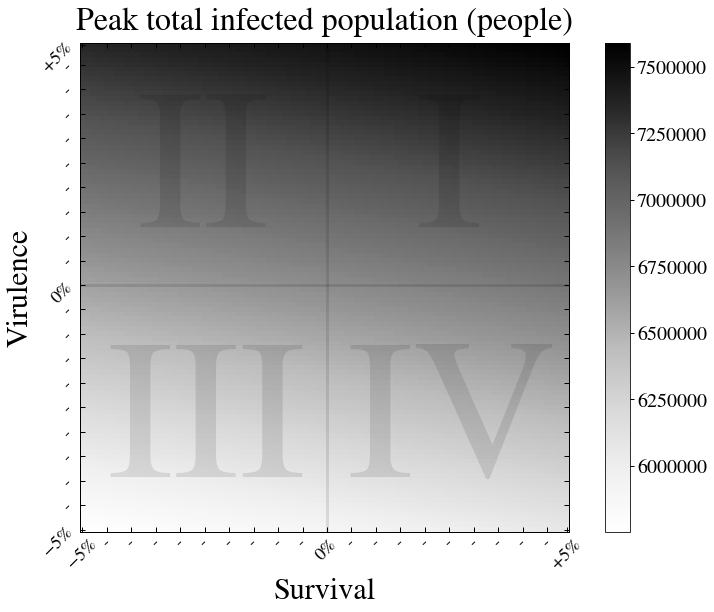

Quadrent I - Min = 6736474.735686136
Quadrent I - Max = 7589888.916632004

Quadrent II - Min = 6597378.587391799
Quadrent II - Max = 7466732.771776883

Quadrent III - Min = 5750122.185926078
Quadrent III - Max = 6718176.690062384

Quadrent IV - Min = 5907027.110187583
Quadrent IV - Max = 6862044.605565593


Min Vir | Min Sur = 5750122.185926078

Max Vir | Max Sur = 7589888.916632004

Max Vir | Min Sur = 7349038.939274039

Min Vir | Max Sur = 6067123.060162469



In [2]:
## Peak Infected Population ###

import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

peaks = []

for i in range(it):
    pks = []
    peaks.append(pks)
    
    for a in range(it):
        m = max(Final[i][a][:,2] + Final[i][a][:,3])
        pks.append(m)

PA_A = np.array(peaks)

mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral'

fig, ax = plt.subplots(1,1,figsize=(13,9))


im = ax.imshow(PA_A,\
               cmap='Greys',\
               origin='lower'
              ) 


## Draw Heatmap ###

plt.ylabel('Virulence' , fontsize = '30')
plt.xlabel('Survival', fontsize = '30')
plt.title('Peak total infected population (people)' , fontsize = '32', pad='14')
plt.axvline(x=50, lw=3, color='k', alpha=0.10, ls='solid')
plt.axhline(y=50, lw=3, color='k', alpha=0.10, ls='solid')
plt.setp(ax.spines.values(), linewidth=1)
plt.text(68, 62, 'I', fontsize=200, alpha=0.10)
plt.text(11, 62, 'II', fontsize=200, alpha=0.10)
plt.text(5, 11, 'III', fontsize=200, alpha=0.10)
plt.text(54, 11, 'IV', fontsize=200, alpha=0.10)


plt.tick_params(axis = 'both', direction = 'in', top = 11, right = 1, labelsize=18, length=5, width=1)
cbar = fig.colorbar(im, drawedges=False)
cbar.ax.tick_params(labelsize=20, width=1)


x = [0, 5, 10 ,15, 20 ,25, 30, 35, 40, 45, 50, 55 ,60, 65, 70, 75, 80, 85, 90, 95, 99]
y = [0, 5, 10 ,15, 20 ,25, 30, 35, 40, 45, 50, 55 ,60, 65, 70, 75, 80, 85, 90, 95, 99]
x_labels = ['$-5\%$','-', '-','-', '-', '-', '-', '-','-', '-', '0%',\
            '-','-','-', '-', '-','-', '-','-', '-','+$5\%$']
y_labels = ['$-5\%$','-', '-','-', '-', '-', '-', '-','-', '-', '0%',\
            '-','-','-', '-', '-','-', '-','-', '-','+$5\%$']
plt.xticks(x)
plt.yticks(y)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticklabels(y_labels, rotation=45, ha = 'right')

plt.show()
fig.savefig('C:/Users/user/Desktop/SEAIR Peaks.jpg', dpi=300, bbox_inches = "tight") 


## Maximum and Minimum Values ###

cut = (len(PA_A) // 2)
III, II, IV, I = PA_A[:cut, :cut], PA_A[cut:, :cut], PA_A[:cut, cut:], PA_A[cut:, cut:]

print(f'Quadrent I - Min = {np.min(I)}\nQuadrent I - Max = {np.max(I)}\n')
print(f'Quadrent II - Min = {np.min(II)}\nQuadrent II - Max = {np.max(II)}\n')
print(f'Quadrent III - Min = {np.min(III)}\nQuadrent III - Max = {np.max(III)}\n')
print(f'Quadrent IV - Min = {np.min(IV)}\nQuadrent IV - Max = {np.max(IV)}\n')

print(f'\nMin Vir | Min Sur = {PA_A[0][0]}\n')
print(f'Max Vir | Max Sur = {PA_A[99][99]}\n')
print(f'Max Vir | Min Sur = {PA_A[99][0]}\n')
print(f'Min Vir | Max Sur = {PA_A[0][99]}\n')



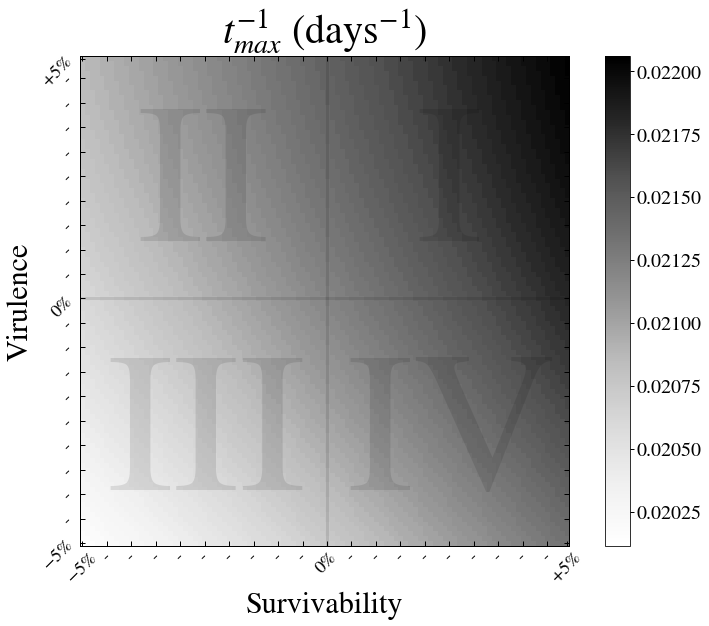

Quadrent I - Min = 0.021205309809576318
Quadrent I - Max = 0.022058985727836235

Quadrent II - Min = 0.020599443815016993
Quadrent II - Max = 0.021437605848178876

Quadrent III - Min = 0.020115462756220705
Quadrent III - Max = 0.021172534987614067

Quadrent IV - Min = 0.02072410005595507
Quadrent IV - Max = 0.021813105313672455


Min Vir | Min Sur = 0.020115462756220705

Max Vir | Max Sur = 0.022058985727836235

Max Vir | Min Sur = 0.020850274181105483

Min Vir | Max Sur = 0.02133743011991636



In [3]:
## tmax inverse ###

import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

peaks = []

for i in range(it):
    pks = []
    peaks.append(pks)
    
    for a in range(it):
        m = (np.argmax(Final[i][a][:,2] + Final[i][a][:,3]))/(TS/A)
        pks.append(m)

PA_A = np.array(peaks) 

mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral'

fig, ax = plt.subplots(1,1,figsize=(13,9))


PA_A = np.reciprocal(PA_A) 
im = ax.imshow(PA_A,\
               cmap='Greys',\
               origin='lower'
              ) 
 
## Draw Heatmap ###
    
plt.ylabel('Virulence' , fontsize = '30')
plt.xlabel('Survivability', fontsize = '30')
plt.title('$t_{max}^{-1}$ (days$^{-1}$)' , fontsize = '40', pad='14')
plt.axvline(x=50, lw=3, color='k', alpha=0.10, ls='solid')
plt.axhline(y=50, lw=3, color='k', alpha=0.10, ls='solid')
plt.setp(ax.spines.values(), linewidth=1)
plt.text(68, 62, 'I', fontsize=200, alpha=0.10)
plt.text(11, 62, 'II', fontsize=200, alpha=0.10)
plt.text(5, 11, 'III', fontsize=200, alpha=0.10)
plt.text(54, 11, 'IV', fontsize=200, alpha=0.10)

plt.tick_params(axis = 'both', direction = 'in', top = 11, right = 1, labelsize=18, length=5, width=1)
cbar = fig.colorbar(im, drawedges=False)
cbar.ax.tick_params(labelsize=20, width=1)


x = [0, 5, 10 ,15, 20 ,25, 30, 35, 40, 45, 50, 55 ,60, 65, 70, 75, 80, 85, 90, 95, 99]
y = [0, 5, 10 ,15, 20 ,25, 30, 35, 40, 45, 50, 55 ,60, 65, 70, 75, 80, 85, 90, 95, 99]
x_labels = ['$-5\%$','-', '-','-', '-', '-', '-', '-','-', '-', '0%',\
            '-','-','-', '-', '-','-', '-','-', '-','+$5\%$']
y_labels = ['$-5\%$','-', '-','-', '-', '-', '-', '-','-', '-', '0%',\
            '-','-','-', '-', '-','-', '-','-', '-','+$5\%$']
plt.xticks(x)
plt.yticks(y)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticklabels(y_labels, rotation=45, ha = 'right')

plt.show()

fig.savefig('C:/Users/user/Desktop/SEAIR Days.jpg', dpi=300, bbox_inches = "tight") 


## Maximum and Minimum Values ###

cut = (len(PA_A) // 2)
III, II, IV, I = PA_A[:cut, :cut], PA_A[cut:, :cut], PA_A[:cut, cut:], PA_A[cut:, cut:]

print(f'Quadrent I - Min = {np.min(I)}\nQuadrent I - Max = {np.max(I)}\n')
print(f'Quadrent II - Min = {np.min(II)}\nQuadrent II - Max = {np.max(II)}\n')
print(f'Quadrent III - Min = {np.min(III)}\nQuadrent III - Max = {np.max(III)}\n')
print(f'Quadrent IV - Min = {np.min(IV)}\nQuadrent IV - Max = {np.max(IV)}\n')

print(f'\nMin Vir | Min Sur = {PA_A[0][0]}\n')
print(f'Max Vir | Max Sur = {PA_A[99][99]}\n')
print(f'Max Vir | Min Sur = {PA_A[99][0]}\n')
print(f'Min Vir | Max Sur = {PA_A[0][99]}\n')



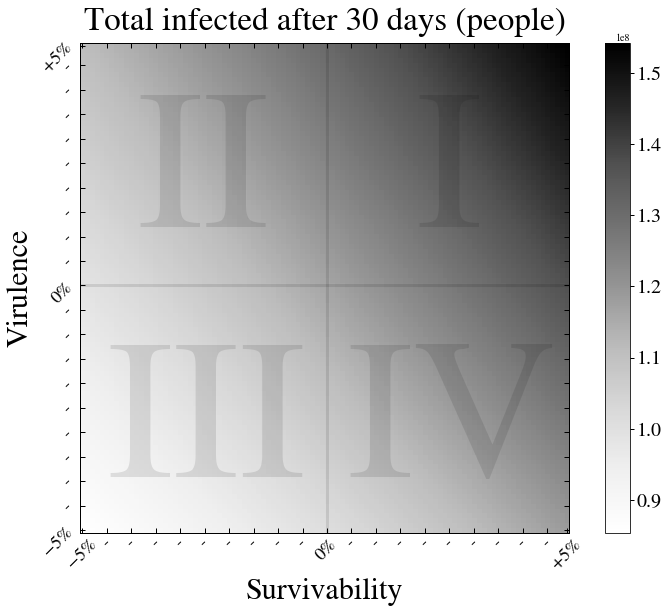

Quadrent I - Min = 116435833.46875437
Quadrent I - Max=154147296.60217816

Quadrent II - Min = 98660784.114879
Quadrent II - Max=130405314.58145104

Quadrent III - Min = 85418998.00175902
Quadrent III - Max=115744256.21856879

Quadrent IV - Min = 100681511.56502248
Quadrent IV - Max=136755495.06855157


Min Vir | Min Sur = 85418998.00175902

Max Vir | Max Sur = 154147296.60217816

Max Vir | Min Sur = 110752289.08232132

Min Vir | Max Sur = 118493680.9855646



In [4]:
## Number of Infected After 30 Days ###

import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

peaks = []

for i in range(it):
    pks = []
    peaks.append(pks)
    
    for a in range(it):
        m = sum(Final[i][a][:411,2] + Final[i][a][:411,3])
        pks.append(m)

PA_A = np.array(peaks)    

mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral'

fig, ax = plt.subplots(1,1,figsize=(13,9))
            
im = ax.imshow(PA_A,\
               cmap='Greys',\
               origin='lower'
              ) 

## Draw Heatmap ###

plt.ylabel('Virulence' , fontsize = '30')
plt.xlabel('Survivability', fontsize = '30')
plt.title('Total infected after 30 days (people)', fontsize = '33', pad='14')
plt.axvline(x=50, lw=3, color='k', alpha=0.10, ls='solid')
plt.axhline(y=50, lw=3, color='k', alpha=0.10, ls='solid')
plt.setp(ax.spines.values(), linewidth=1)
plt.text(68, 62, 'I', fontsize=200, alpha=0.10)
plt.text(11, 62, 'II', fontsize=200, alpha=0.10)
plt.text(5, 11, 'III', fontsize=200, alpha=0.10)
plt.text(54, 11, 'IV', fontsize=200, alpha=0.10)

plt.tick_params(axis = 'both', direction = 'in', top = 11, right = 1, labelsize=18, length=5, width=1)
cbar = fig.colorbar(im, drawedges=False) 
cbar.ax.tick_params(labelsize=20, width=1)


x = [0, 5, 10 ,15, 20 ,25, 30, 35, 40, 45, 50, 55 ,60, 65, 70, 75, 80, 85, 90, 95, 99]
y = [0, 5, 10 ,15, 20 ,25, 30, 35, 40, 45, 50, 55 ,60, 65, 70, 75, 80, 85, 90, 95, 99]
x_labels = ['$-5\%$','-', '-','-', '-', '-', '-', '-','-', '-', '0%',\
            '-','-','-', '-', '-','-', '-','-', '-','+$5\%$']
y_labels = ['$-5\%$','-', '-','-', '-', '-', '-', '-','-', '-', '0%',\
            '-','-','-', '-', '-','-', '-','-', '-','+$5\%$']
plt.xticks(x)
plt.yticks(y)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticklabels(y_labels, rotation=45, ha = 'right')

plt.show()

fig.savefig('C:/Users/user/Desktop/SEAIR 30 Days.jpg', dpi=300, bbox_inches = "tight") 


## Maximum and Minimum Values ###

cut = (len(PA_A) // 2)
III, II, IV, I = PA_A[:cut, :cut], PA_A[cut:, :cut], PA_A[:cut, cut:], PA_A[cut:, cut:]

print(f'Quadrent I - Min = {np.min(I)}\nQuadrent I - Max={np.max(I)}\n')
print(f'Quadrent II - Min = {np.min(II)}\nQuadrent II - Max={np.max(II)}\n')
print(f'Quadrent III - Min = {np.min(III)}\nQuadrent III - Max={np.max(III)}\n')
print(f'Quadrent IV - Min = {np.min(IV)}\nQuadrent IV - Max={np.max(IV)}\n')

print(f'\nMin Vir | Min Sur = {PA_A[0][0]}\n')
print(f'Max Vir | Max Sur = {PA_A[99][99]}\n')
print(f'Max Vir | Min Sur = {PA_A[99][0]}\n')
print(f'Min Vir | Max Sur = {PA_A[0][99]}\n')



# Basic Reproductive Ratio Heatmap

In [5]:
%%time

### Initializations ###

%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as spy
from sympy import *
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


### Initial Definitions ###

it = 100
Final = []
adjust = 0.05


### Nominal Parameters ###

beta_A = 0.5497938413115383
beta_I = 0.4909463148261044
beta_W = 0.031100446700197397
sigma_A = 3.403914785083266
sigma_I = 13.492166134223032
epsilon = 2.478385725999245
mu = 1/(80.3 * 365) 
muI = 1/(80.3 * 365) + 0.038/(3.5*7)
nu = 0.03053968253968254
k = 0.6486486486486486
p = 0.956
eta = 5.5 
omega = 1/(eta - epsilon)


### Virulance Sweep (Y-Axis) ###

each_y_var_eta = np.linspace((eta+(eta * adjust)), (eta - (eta * adjust)), it)                     
each_y_var_nu = np.linspace((nu+(nu * adjust)), (nu - (nu * adjust)), it)                           
each_y_var_muI = np.linspace((muI-(muI * adjust)), (muI + (muI * adjust)), it)                      
each_y_var_beta_A = np.linspace((beta_A-(beta_A * adjust)), (beta_A + (beta_A * adjust)), it)       
each_y_var_beta_I = np.linspace((beta_I-(beta_I * adjust)), (beta_I + (beta_I * adjust)), it)      
each_y_var_sigma_A = np.linspace((sigma_A-(sigma_A * adjust)), (sigma_A + (sigma_A * adjust)), it)  
each_y_var_sigma_I = np.linspace((sigma_I-(sigma_I * adjust)), (sigma_I + (sigma_I * adjust)), it)  
each_y_var_sigma_A = np.linspace((sigma_A),(sigma_A), it)  # sigma_A UP
each_y_var_sigma_I = np.linspace((sigma_I),(sigma_I), it)  # sigma_I UP

each_y_var_p = np.linspace((p+(p * adjust)), (p - (p * adjust)), it)                               
each_y_var_epsilon = np.linspace((epsilon-(epsilon * adjust)), (epsilon + (epsilon * adjust)), it)  


### Survival Sweep (X-Axis) ###

each_x_var_k = np.linspace((k+(k * adjust)), (k - (k * adjust)), it)                                
each_x_var_beta_W = np.linspace((beta_W-(beta_W * adjust)), (beta_W + (beta_W * adjust)), it)      


for all_y_vars in range(it):                                     
    
    almost = []
    Final.append(almost)

    for all_x_vars in range(it):                                                                                   
        
        ### Initial Conditions ###

        V0 = [57.05 * 10**6, 5*13.3, 13.3, 13.3, 0, 0.01]

        ### Changing Definitions ###  

        beta_A = each_y_var_beta_A[all_y_vars]
        beta_I = each_y_var_beta_I[all_y_vars]
        beta_W = each_x_var_beta_W[all_x_vars]
        sigma_A = each_y_var_sigma_A[all_y_vars]
        sigma_I = each_y_var_sigma_I[all_y_vars]
        epsilon = each_y_var_epsilon[all_y_vars]
        mu = 1/(80.3 * 365) 
        muI = each_y_var_muI[all_y_vars]
        nu = each_y_var_nu[all_y_vars]
        k = each_x_var_k[all_x_vars]
        p = each_y_var_p[all_y_vars]
        eta = each_y_var_eta[all_y_vars]
        omega = 1/(each_y_var_eta[all_y_vars] - each_y_var_epsilon[all_y_vars])  
        

        ### Ro Equations ###

        Rp = (epsilon * (beta_A * (muI + nu) + beta_I * (1 - p) * omega)) / ((mu + epsilon) * (mu + omega) * (muI + nu))
        
        Re = (epsilon * beta_W * (sigma_A * (muI + nu) + sigma_I * (1 - p) * omega)) / (k * (mu + epsilon) * (mu + omega) * (muI + nu))
        
        Ro = (Rp + sqrt((Rp**2) + (4 * Re)) )/ 2
        
        almost.append(Ro)




Wall time: 2.37 s


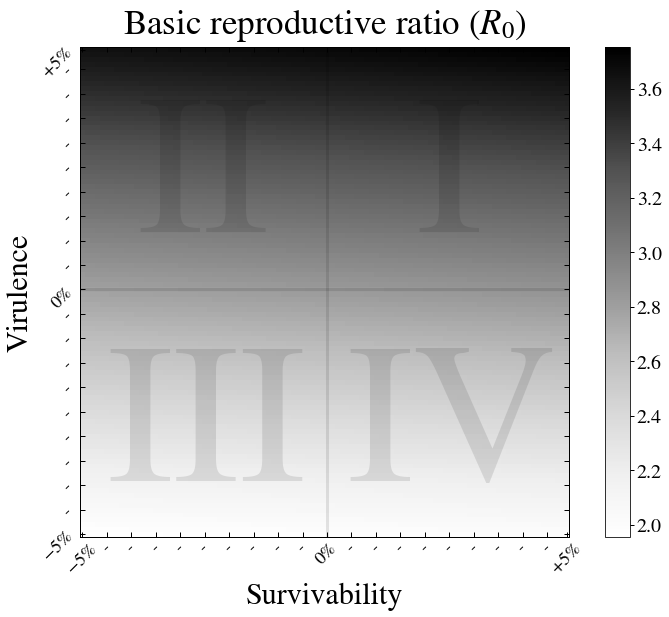

Quadrent I - Min = 2.8310252805618124
Quadrent I - Max = 3.7525027891991387

Quadrent II - Min = 2.7902967293414322
Quadrent II - Max = 3.695303683788589

Quadrent III - Min = 1.9576736109733899
Quadrent III - Max = 2.81313140865777

Quadrent IV - Min = 1.9788617539084297
Quadrent IV - Max = 2.8566688116714123


Min Vir | Min Sur = 1.9576736109733899

Max Vir | Max Sur = 3.7525027891991387

Max Vir | Min Sur = 3.643293742078976

Min Vir | Max Sur = 2.001365541212388



In [6]:
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator


PA1 = np.array(Final)    

PA_A = PA1.astype('float64') 

mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral'

def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

fig, ax = plt.subplots(1,1,figsize=(13,9))
          
im = ax.imshow(PA_A,\
               cmap='Greys',\
               origin='lower'
              ) 

## Draw Heatmap ##
 
plt.ylabel('Virulence' , fontsize = '30')
plt.xlabel('Survivability', fontsize = '30')
plt.title('Basic reproductive ratio ($R_0$)', fontsize = '35', pad='14')
plt.axvline(x=50, lw=3, color='k', alpha=0.10, ls='solid')
plt.axhline(y=50, lw=3, color='k', alpha=0.10, ls='solid')
plt.setp(ax.spines.values(), linewidth=1)
plt.text(68, 62, 'I', fontsize=200, alpha=0.10)
plt.text(11, 62, 'II', fontsize=200, alpha=0.10)
plt.text(5, 11, 'III', fontsize=200, alpha=0.10)
plt.text(54, 11, 'IV', fontsize=200, alpha=0.10)

plt.tick_params(axis = 'both', direction = 'in', top = 11, right = 1, labelsize=18, length=5, width=1)
cbar = fig.colorbar(im, drawedges=False) # format=ticker.FuncFormatter(fmt)
cbar.ax.tick_params(labelsize=20, width=1)


x = [0, 5, 10 ,15, 20 ,25, 30, 35, 40, 45, 50, 55 ,60, 65, 70, 75, 80, 85, 90, 95, 99]
y = [0, 5, 10 ,15, 20 ,25, 30, 35, 40, 45, 50, 55 ,60, 65, 70, 75, 80, 85, 90, 95, 99]
x_labels = ['$-5\%$','-', '-','-', '-', '-', '-', '-','-', '-', '0%',\
            '-','-','-', '-', '-','-', '-','-', '-','+$5\%$']
y_labels = ['$-5\%$','-', '-','-', '-', '-', '-', '-','-', '-', '0%',\
            '-','-','-', '-', '-','-', '-','-', '-','+$5\%$']
plt.xticks(x)
plt.yticks(y)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticklabels(y_labels, rotation=45, ha = 'right')

plt.show()

fig.savefig('C:/Users/user/Desktop/SEAIR Ro.jpg', dpi=300, bbox_inches = "tight") 


## Maximum and Minimum Values ###

cut = (len(PA_A) // 2)
III, II, IV, I = PA_A[:cut, :cut], PA_A[cut:, :cut], PA_A[:cut, cut:], PA_A[cut:, cut:]

print(f'Quadrent I - Min = {np.min(I)}\nQuadrent I - Max = {np.max(I)}\n')
print(f'Quadrent II - Min = {np.min(II)}\nQuadrent II - Max = {np.max(II)}\n')
print(f'Quadrent III - Min = {np.min(III)}\nQuadrent III - Max = {np.max(III)}\n')
print(f'Quadrent IV - Min = {np.min(IV)}\nQuadrent IV - Max = {np.max(IV)}\n')

print(f'\nMin Vir | Min Sur = {PA_A[0][0]}\n')
print(f'Max Vir | Max Sur = {PA_A[99][99]}\n')
print(f'Max Vir | Min Sur = {PA_A[99][0]}\n')
print(f'Min Vir | Max Sur = {PA_A[0][99]}\n')



# Ro Tornado Plot

In [47]:
import csv
import pickle
import numpy as np
import random as rnd
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib as mpl
import pylab as plt
import os

# sets a pretty font for figures:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

# set the current working directory (ensure it includes the data files):
# os.chdir('<Directory>')   # sets the cwd as '<place_your_path_here>'


def Ro(ba, bi, bw, sa, si, eps, nuu, mui, muu, omeg, kk, pp):
    exit_rates = (eps + muu) * (mui + nuu) * (muu + omeg)
    zeta = eps * (ba * (mui + nuu) + bi * (1 - pp) * omeg) / exit_rates
    eta = 4 * eps * bw * (sa * (mui + nuu) + si * (1 - pp) * omeg) / (kk * exit_rates)
    return (zeta + np.sqrt(zeta**2 + eta))/2


%matplotlib inline


D = 2*365             
t_steps = 10**4        
inc_pd = 5.5            
dt = round(t_steps/D)           
t = np.linspace(0, D, t_steps) 

nu = 0.03053968253968254 
mu = 1/(80.3 * 365)      
muI = mu + 0.038/(3.5*7)  
k = 0.6486486486486486    
p = 0.956                 


# Initial conditions
X0 = [57.05 * 10**6, 5*13.3, 13.3, 13.3, 0, 0.01]


def dXdt(X, t, bA, bI, bW, sA, sI, epsilon): 
    
    S = X[0]
    E = X[1]
    A = X[2]
    I = X[3]
    R = X[4]
    W = X[5]

    N = S + E + A + I + R
    L = (bA * A + bI * I)/N + bW * W
    
    omega = 1/(inc_pd - epsilon)
    
    dSdt = mu * (N - S) - L * S
    dEdt = L * S - (1/epsilon + mu) * E
    dAdt = (1/epsilon) * E - (omega + mu) * A
    dIdt = (1 - p) * omega * A - (nu + muI) * I
    dRdt = p * omega * A + nu * I - mu * R
    dWdt = (sA * A + sI * I) * (1 - W)/N - k * W

    return np.array([dSdt, dEdt, dAdt, dIdt, dRdt, dWdt])




omeg 2.9043679659908954 2.747510551516422
betaA 2.751381718273609 2.892951528628528
betaI 2.7932943010700884 2.8506004849531053
nu 2.863752539841788 2.783669530389693
betaW 2.8009456167765485 2.84260119772006
k 2.8436834250281473 2.8019497473713244
sigmaA 2.8144409406134416 2.8293344517144385
sigmaI 2.808470471466932 2.835230268596181
muI 2.8239833479181025 2.819835259570155
epsln 2.821893742820496 2.821914131761538
mu 2.8219270137788506 2.8218818804752965


Text(0.5, 1.0, '$R_0$ parameter sensitivity')

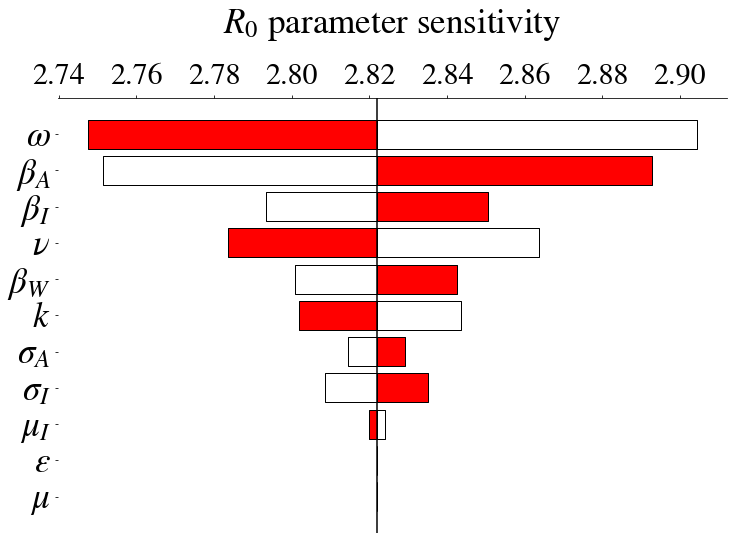

In [46]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'



bA = 0.5497938413115383
bI = 0.4909463148261044
bW = 0.031100446700197397
sA = 3.403914785083266
sI = 13.492166134223032
epsilon = 1/2.478385725999245  
omega = 0.33094892640811974
mu = 3.411863047817261*10**(-5)
muI = 0.0015851390386414379
nu = 0.03053968253968254
k = 0.6486486486486486
p = 0.956

adjustment = 0.050
start = 0.81
dy = 0.081

def Rp(ba, bi, bw, sa, si, eps, nuu, mui, muu, omeg, kk, pp):
    num = eps * (ba * (mui + nuu) + bi * (1 - pp) * omeg)
    den = (muu + eps) * (muu + omeg) * (mui + nuu)
    return num/den

def Re(ba, bi, bw, sa, si, eps, nuu, mui, muu, omeg, kk, pp):
    num = eps * bw * (sa * (mui + nuu) + si * (1 - pp) * omeg)
    den = kk * (muu + eps) * (muu + omeg) * (mui + nuu)
    return num/den

def simpleR0(ba, bi, bw, sa, si, eps, nuu, mui, muu, omeg, kk, pp):
    rp = Rp(ba, bi, bw, sa, si, eps, nuu, mui, muu, omeg, kk, pp)
    re = Re(ba, bi, bw, sa, si, eps, nuu, mui, muu, omeg, kk, pp)
    return (rp + np.sqrt(rp**2 + 4 * re))/2


varbls = {'omeg': (r'$\omega$', 9, 'k'),
          'betaA': (r'$\beta_A$', 0, 'b'),
          'betaI': (r'$\beta_I$', 1, 'b'),
          'nu': (r'$\nu$', 6, 'k'),
          'betaW': (r'$\beta_W$', 2, 'g'),
          'k': ('$k$', 10, 'g'),
          'sigmaA': (r'$\sigma_A$', 3, 'g'),
          'sigmaI': (r'$\sigma_I$', 4, 'g'),
          'muI': (r'$\mu_I$', 7, 'k'),
          'epsln': (r'$\epsilon$', 5, 'k'),
          'mu': (r'$\mu$', 8, 'k')
         }


R0_function, R0_label, xloc, label = simpleR0, '\mathscr{R}_0', 0.32, 'A'

base = R0_function(bA, bI, bW, sA, sI, epsilon, nu, muI, mu, omega, k, p)

lows = []
highs = []

varz = [bA, bI, bW, sA, sI, epsilon, nu, muI, mu, omega, k, p]  

for var in varbls:
    
    new_varz = list(varz)
    i = varbls[var][1]
    
    # increment up:
    new_varz[i] = varz[i] * (1 + adjustment)
    highs.append(R0_function(*new_varz) - base)
    
    # increment down:
    new_varz[i] = varz[i] * (1 - adjustment)
    lows.append(R0_function(*new_varz) - base)


fig = plt.figure(figsize=[12, 8])

# The y position for each variable
ys = range(len(varbls))[::-1] 

# Plot the bars, one by one
for var, y, low, high in zip(varbls, ys, lows, highs):
    print(var, low + base, high + base)
    
    if low < 0:
        low_width = -low
        high_width = high
        plt.broken_barh(
        [(base + low, low_width), (base, high_width)],
        (y - 0.4, 0.8),
        facecolors=['white', 'red'],  
        edgecolors=['black', 'black'],
        linewidth=1,
        )
    else:
        low_width = low
        high_width = -high
        plt.broken_barh(
        [(base, low_width), (base + high, high_width)],
        (y - 0.4, 0.8),
        facecolors=['white', 'red'], 
        edgecolors=['black', 'black'],
        linewidth=1,
        )


# Draw a vertical line down the middle
plt.axvline(base, color='black')

# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')


# Make the y-axis display the variables
plt.yticks(ys, [x[0] for x in varbls.values()], fontsize = 35)

plt.xticks(fontsize = 30)


# Set the portion of the x- and y-axes to show
plt.ylim(-1, len(varbls))

plt.title('$R_0$ parameter sensitivity', fontsize = 35, pad = 30)





# Nominal Ro Value

In [41]:
ba = 0.5497938413115383
bi = 0.4909463148261044
bw = 0.031100446700197397
sa = 3.403914785083266
si = 13.492166134223032
eps = 1/2.478385725999245  
omeg = 0.33094892640811974
muu = 3.411863047817261*10**(-5)
mui = 0.0015851390386414379
nuu = 0.03053968253968254
kk = 0.6486486486486486
pp = 0.956

simpleR0(ba, bi, bw, sa, si, eps, nuu, mui, muu, omeg, kk, pp)


2.8219044469723835